In [20]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
from riotwatcher import LolWatcher

%matplotlib inline

In [40]:
name_list = []

for file in os.listdir("Player_Time_Data_2/"):
    df = pd.read_csv("Player_Time_Data_2/{}".format(file),
                          dtype='str,str,float,float', 
                          delimiter = " ",
                          usecols=(0,1,2,3),
                          header = None
                        )

    df.columns = ["puuid", "match_id", "start_time", "duration"]
    
    name = watcher.summoner.by_puuid("na1", df["puuid"][0])["name"]
    
    name_list.append(name)

In [41]:
name_list

['Stééz',
 'Skopeftis',
 'KFC Jamall',
 'babysharkdododo',
 'KoalaTeaGamer',
 'Rythmatical',
 'fudgemuffin2',
 'Omegatopia',
 'puddingpiler',
 'Darathrius']

In [42]:
import datetime

0 out of 960 games had start time errors
0 out of 981 games had start time errors
0 out of 999 games had start time errors
0 out of 999 games had start time errors
                                                 puuid        match_id  \
478  x_ZGzybk4otkANJX71PlKZgosMhzh8FUx13NZ7Nenl7Gri...  NA1_4174639924   
6    x_ZGzybk4otkANJX71PlKZgosMhzh8FUx13NZ7Nenl7Gri...  NA1_3949901221   
5    x_ZGzybk4otkANJX71PlKZgosMhzh8FUx13NZ7Nenl7Gri...  NA1_3949935870   
4    x_ZGzybk4otkANJX71PlKZgosMhzh8FUx13NZ7Nenl7Gri...  NA1_3950103551   
3    x_ZGzybk4otkANJX71PlKZgosMhzh8FUx13NZ7Nenl7Gri...  NA1_3950076589   

       start_time   duration  
478  0.000000e+00        0.0  
6    1.624165e+12  1663308.0  
5    1.624167e+12  1393593.0  
4    1.624176e+12  1549832.0  
3    1.624178e+12  1211374.0  
1 out of 478 games had start time errors
0 out of 353 games had start time errors
0 out of 1000 games had start time errors
0 out of 419 games had start time errors
0 out of 997 games had start time errors

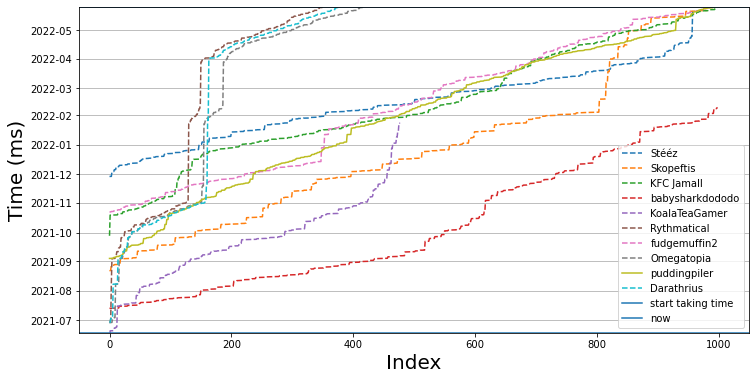

In [73]:
'''fig, axes = plt.subplots(nrows = 5, 
                       ncols=2, 
                       figsize = (20,15), 
                       sharex=True, 
                       sharey=True)
'''
watcher = LolWatcher(api_key="RGAPI-f922ea08-3c79-4dc6-b807-adbb20db5bb3")

pudding_puuid = watcher.summoner.by_name(region="na1",summoner_name="puddingpiler")["puuid"]

fig, ax = plt.subplots(figsize = (12,6))

axis_list = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1)]

for i, file in enumerate(os.listdir("Player_Time_Data_2/")):
    
    df = pd.read_csv("Player_Time_Data_2/{}".format(file),
                          dtype='str,str,float,float', 
                          delimiter = " ",
                          usecols=(0,1,2,3),
                          header = None
                        )
    
    
    
    df.columns = ["puuid", "match_id", "start_time", "duration"]

    df.drop_duplicates(inplace=True)
    
    if i == 4: print (df.sort_values("start_time").head())
    beginning = 1623987436 #in seconds
    #df = df[df["start_time"] > beginning]
    print("{} out of {} games had start time errors".format(sum(df["start_time"]<beginning),len(df["start_time"])))
    df["start_time_seconds"] = df["start_time"].apply(lambda x : x/1000)
    
    df["start_time_date"] = df["start_time_seconds"].apply(lambda x : datetime.datetime.fromtimestamp(int(x)))
    
    df.sort_values(by = "start_time_date", ascending=True, inplace=True, ignore_index=True)
    
    if df["puuid"][0] == pudding_puuid: 
    
        ax.plot(range(len(df["start_time_date"])), df["start_time_date"], label = name_list[i])
        
    else:
        
        ax.plot(range(len(df["start_time_date"])), df["start_time_date"], ls = "--", label = name_list[i])
    
    
now = 1653528536
ax.axhline(y = datetime.datetime.fromtimestamp(beginning), label = "start taking time") #start time in ms
ax.axhline(y = datetime.datetime.fromtimestamp(now), label = "now") #now time in ms
plt.xlabel("Index", fontsize = 20)
plt.ylabel("Time (ms)", fontsize = 20)
plt.grid(axis = "y", which = "both")
plt.ylim(datetime.datetime.fromtimestamp(beginning), datetime.datetime.fromtimestamp(now))
plt.legend()

# Plotting Without Sorting

(18795.85921296296, 19137.770092592593)

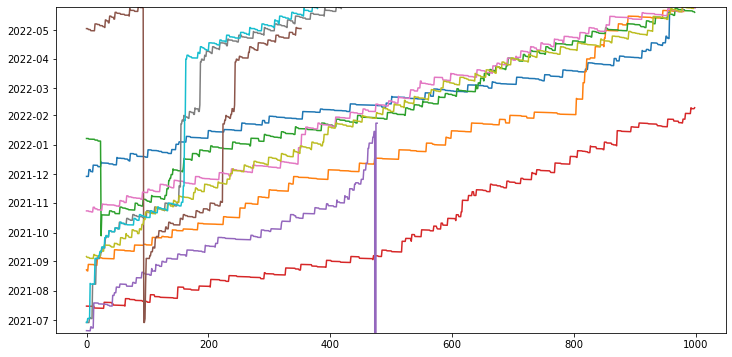

In [53]:
fig, ax = plt.subplots(figsize = (12,6))



for i, file in enumerate(os.listdir("Player_Time_Data_2/")):
    
    df = pd.read_csv("Player_Time_Data_2/{}".format(file),
                          dtype='str,str,float,float', 
                          delimiter = " ",
                          usecols=(0,1,2,3),
                          header = None
                        )
    
    
    
    df.columns = ["puuid", "match_id", "start_time", "duration"]

    df.drop_duplicates(inplace=True)
    
    beginning = 1623987436 #in seconds
    now = 1653528536
    
    df["start_time_seconds"] = df["start_time"].apply(lambda x : x/1000)
    
    df["start_time_date"] = df["start_time_seconds"].apply(lambda x : datetime.datetime.fromtimestamp(int(x)))
    
    
        
    ax.plot(range(len(df["start_time_date"])), df["start_time_date"])
    
plt.ylim(datetime.datetime.fromtimestamp(beginning),datetime.datetime.fromtimestamp(now))